In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data/510_data.csv", index_col=0)
df

,Mun_Code,typhoon,HAZ_rainfall_Total,HAZ_rainfall_max_6h,HAZ_rainfall_max_24h,HAZ_v_max,HAZ_dis_track_min,GEN_landslide_per,GEN_stormsurge_per,GEN_Bu_p_inSSA,...,VUL_LightRoof_StrongWall,VUL_LightRoof_LightWall,VUL_LightRoof_SalvageWall,VUL_SalvagedRoof_StrongWall,VUL_SalvagedRoof_LightWall,VUL_SalvagedRoof_SalvageWall,VUL_vulnerable_groups,VUL_pantawid_pamilya_beneficiary,DAM_perc_dmg,HAZ_v_max_3
0,PH175101000,durian2006,185.828571,14.716071,7.381696,55.032241,2.478142,2.64,6.18,6.18,...,2.533055,41.892832,1.002088,0.000000,0.027836,0.083507,2.951511,46.931106,3.632568,166667.757548
2,PH083701000,durian2006,8.818750,0.455208,0.255319,8.728380,288.358553,0.06,0.00,0.00,...,1.218595,13.645253,0.549120,0.030089,0.090266,0.112833,3.338873,25.989168,0.000000,664.968323
4,PH015501000,durian2006,24.175000,2.408333,0.957639,10.945624,274.953818,1.52,1.28,1.28,...,0.667374,15.592295,0.075838,0.000000,0.015168,0.075838,2.131755,32.185651,0.000000,1311.358762
6,PH015502000,durian2006,14.930000,1.650000,0.586250,12.108701,252.828578,0.00,0.00,0.00,...,0.675125,7.100454,0.023280,0.011640,0.000000,0.128041,1.589369,29.612385,0.000000,1775.385328
7,PH175302000,durian2006,13.550000,1.054167,0.528125,10.660943,258.194381,5.52,0.36,0.36,...,0.821288,30.354796,0.000000,0.000000,0.032852,0.000000,1.387007,35.052562,0.000000,1211.676901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,PH084823000,noul2015,9.700000,0.408333,0.216146,8.136932,277.107823,1.80,6.25,6.25,...,3.613707,32.492212,0.311526,0.031153,0.155763,0.031153,2.827833,31.308411,0.000000,538.743551
25837,PH015547000,noul2015,17.587500,1.414583,0.386458,9.818999,305.789817,0.00,0.00,0.00,...,0.383275,4.703833,0.027875,0.000000,0.034843,0.097561,1.073268,12.766551,0.000000,946.676507
25838,PH025014000,noul2015,11.487500,0.614583,0.230319,15.791907,210.313249,0.06,0.09,0.09,...,0.090110,3.063753,0.022528,0.000000,0.067583,0.022528,1.140109,9.348952,0.000000,3938.254316
25839,PH140127000,noul2015,11.600000,1.400000,0.412766,13.867145,218.189328,0.00,0.00,0.00,...,0.094518,3.119093,0.000000,0.000000,0.000000,0.000000,2.837537,21.928166,0.000000,2666.620370


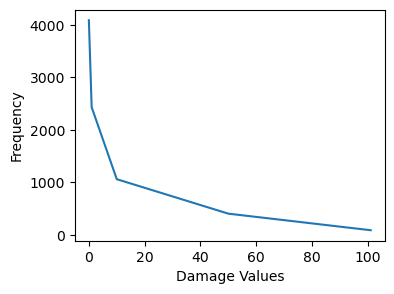

In [3]:
bins2 = [0, 0.00009, 1, 10, 50, 101]
samples_per_bin2, binsP2 = np.histogram(df['DAM_perc_dmg'], bins=bins2)
plt.figure(figsize=(4, 3))
plt.xlabel("Damage Values")
plt.ylabel("Frequency")
plt.plot(binsP2[1:],samples_per_bin2)

In [4]:
print(samples_per_bin2)
print(binsP2)

[4086 2431 1061  405   90]
[0.00e+00 9.00e-05 1.00e+00 1.00e+01 5.00e+01 1.01e+02]


In [5]:
df["DAM_perc_dmg"].value_counts(bins=binsP2)

(-0.001, 9e-05]    4086
(9e-05, 1.0]       2431
(1.0, 10.0]        1061
(10.0, 50.0]        405
(50.0, 101.0]        90
Name: DAM_perc_dmg, dtype: int64

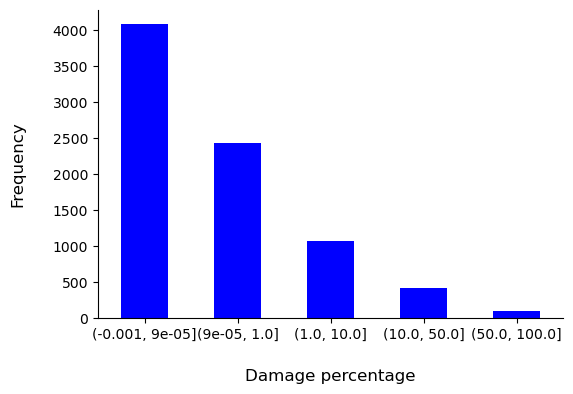

In [6]:
#Count numbers in each bin and create a bar plot

check = pd.cut(df['DAM_perc_dmg'], bins=[0, 0.00009, 1, 10, 50, 100], include_lowest=True)
ax = check.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
    

# Set x-axis label
ax.set_xlabel("Damage percentage", labelpad=20, size=12)

# Set y-axis label
ax.set_ylabel("Frequency", labelpad=20, size=12)


fig = ax.get_figure()
fig.savefig('figures/bin_of_damage_mun.pdf', bbox_inches='tight')

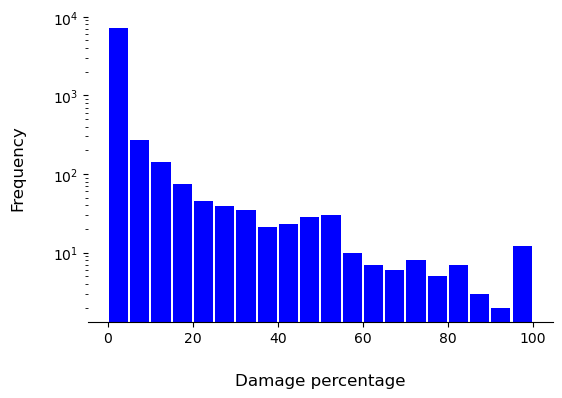

In [7]:
from matplotlib.ticker import StrMethodFormatter
ax = df.hist(column='DAM_perc_dmg', bins=20, grid=False, figsize=(6,4), color='b', zorder=2, rwidth=0.9,
            log=True
            )

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    

    # Set title
    x.set_title("", size=10, color='b')

    # Set x-axis label
    x.set_xlabel("Damage percentage", labelpad=20, size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, size=12)
    
fig = ax[0].get_figure()
fig.savefig('figures/hist_of_damage_mun.pdf', bbox_inches='tight')

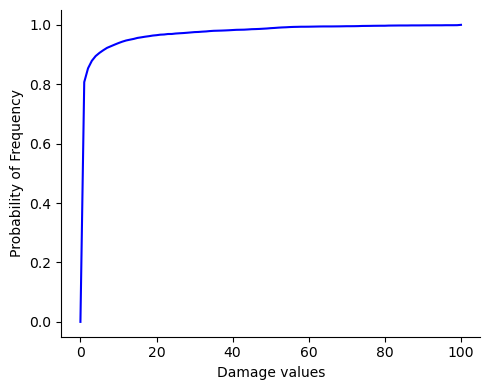

In [8]:
plt.rcParams["figure.figsize"] = [5, 4]
plt.rcParams["figure.autolayout"] = True

samples_per_bin2, binsP2 = np.histogram(df["DAM_perc_dmg"], bins=100)
pdf = samples_per_bin2 / sum(samples_per_bin2)
cdf = np.insert(np.cumsum(pdf), 0, 0)
plt.plot(binsP2, cdf, label="CDF", color='b')
#plt.legend()

for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)


plt.xlabel("Damage values")
plt.ylabel("Probability of Frequency")
plt.savefig("figures/cdf_of_damage_mun.pdf", bbox_inches='tight')